In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import warnings
warnings.filterwarnings('ignore') 

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

MedianHouseholdIncome2015.csv
PercentOver25CompletedHighSchool.csv
PercentagePeopleBelowPovertyLevel.csv
PoliceKillingsUS.csv
ShareRaceByCity.csv



# Read datas

In [67]:
median_house_hold_in_come = pd.read_csv('../input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('../input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('../input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('../input/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('../input/PoliceKillingsUS.csv', encoding="windows-1252")

# Poverty rate of each state

In [68]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [69]:
percentage_people_below_poverty_level.shape

(29329, 3)

In [70]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [71]:
percentage_people_below_poverty_level['Geographic Area'] 

0        AL
1        AL
2        AL
3        AL
4        AL
5        AL
6        AL
7        AL
8        AL
9        AL
10       AL
11       AL
12       AL
13       AL
14       AL
15       AL
16       AL
17       AL
18       AL
19       AL
20       AL
21       AL
22       AL
23       AL
24       AL
25       AL
26       AL
27       AL
28       AL
29       AL
         ..
29299    WY
29300    WY
29301    WY
29302    WY
29303    WY
29304    WY
29305    WY
29306    WY
29307    WY
29308    WY
29309    WY
29310    WY
29311    WY
29312    WY
29313    WY
29314    WY
29315    WY
29316    WY
29317    WY
29318    WY
29319    WY
29320    WY
29321    WY
29322    WY
29323    WY
29324    WY
29325    WY
29326    WY
29327    WY
29328    WY
Name: Geographic Area, Length: 29329, dtype: object

*Need to plot a graph between Poverty Rate and Geographic Area*

In [72]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [73]:
percentage_people_below_poverty_level

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
5,AL,Alabaster city,11.2
6,AL,Albertville city,26.7
7,AL,Alexander City city,30.4
8,AL,Alexandria CDP,9.7
9,AL,Aliceville city,41.3


In [74]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []

for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
    
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
sorted_data

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675
18,LA,22.291772
40,SC,22.105556
48,WV,21.082222
0,AL,20.611795
36,OK,20.545895


Text(0.5,1,'Poverty Rate Given States')

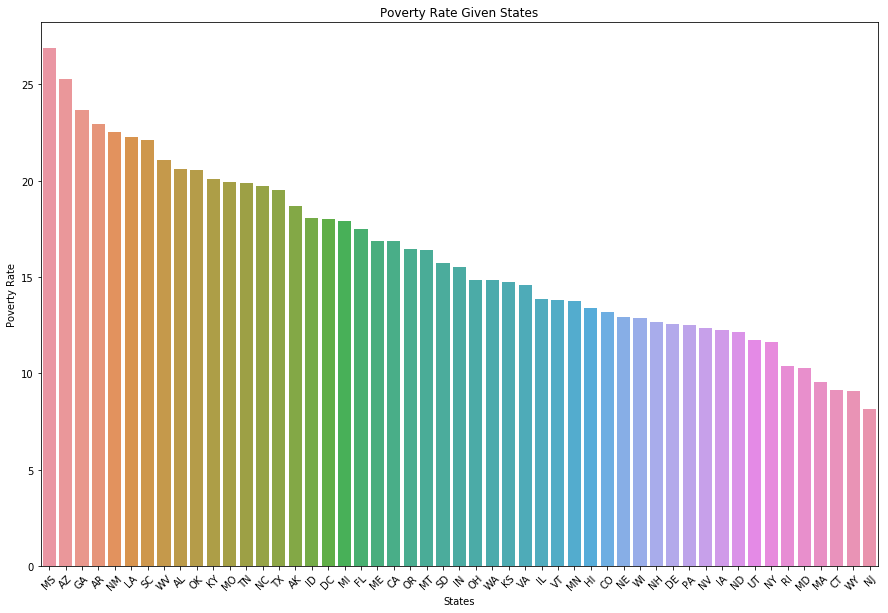

In [75]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

# Most common 15 Name or Surname of killed people

In [76]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [77]:
kill.name.value_counts()

TK TK                       49
Michael Brown                2
TK Tk                        2
Eric Harris                  2
Brandon Jones                2
Michael Johnson              2
Daquan Antonio Westbrook     2
Jacob Faulkner               1
Adrian Maurice Hardeman      1
William Clifford Cole        1
Billy D. Smith               1
Thomas P. Mone               1
Lucille Espinosa             1
Juan Carlos Cuadra           1
Angel Ramos                  1
Shaquille Barrow             1
Jacob Taulbee                1
Rip Huntington               1
Thurman Reynolds             1
Angelo West                  1
William Ferguson             1
Patrick Fennell              1
William Lemmon               1
Michael Lamar Robinson       1
Roger Braswell               1
Jason Hendley                1
Kevin McDaniel               1
Joseph Louis Melvin          1
Jack Yantis                  1
David Lepine                 1
                            ..
Joseph Potts                 1
Joshua B

In [78]:
separate = kill.name[kill.name != 'TK TK'].str.split()
separate

0                               [Tim, Elliot]
1                        [Lewis, Lee, Lembke]
2                      [John, Paul, Quintero]
3                          [Matthew, Hoffman]
4                        [Michael, Rodriguez]
5                       [Kenneth, Joe, Brown]
6                     [Kenneth, Arnold, Buck]
7                            [Brock, Nichols]
8                            [Autumn, Steele]
9                         [Leslie, Sapp, III]
10                          [Patrick, Wetter]
11                               [Ron, Sneed]
12        [Hashim, Hanif, Ibn, Abdul-Rasheed]
13                 [Nicholas, Ryan, Brickman]
14      [Omarr, Julian, Maximillian, Jackson]
15                           [Loren, Simpson]
16                    [James, Dudley, Barker]
17                    [Artago, Damon, Howard]
18                            [Thomas, Hamby]
19                           [Jimmy, Foreman]
20                           [Andy, Martinez]
21                             [To

In [79]:
a,b = zip(*separate)   
a

('Tim',
 'Lewis',
 'John',
 'Matthew',
 'Michael',
 'Kenneth',
 'Kenneth',
 'Brock',
 'Autumn',
 'Leslie',
 'Patrick',
 'Ron',
 'Hashim',
 'Nicholas',
 'Omarr',
 'Loren',
 'James',
 'Artago',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'John',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Jeffrey',
 'Donte',
 'Kavonda',
 'Quincy',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Todd',
 'Miguel',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Robert',
 'Demaris',
 'Jose',
 'Wendell',
 'Daryl',
 'Darin',
 'Orlando',
 'William',
 'Jessie',
 'Raymond',
 'Joshua',
 'David',
 'Nicolas',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Alan',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'John',
 'Victor',
 'Edward',
 'Jacob',
 'David',
 'Francis',
 'Ledarius',
 'Yuvette',
 'Dewayne',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Jimmy',
 'Markell',
 'Paul',
 'Herbert',
 'John',
 'Jam

In [80]:
a,b = zip(*separate)                    
name_list = a+b 
print("Name List:",name_list, "\n")
name_count = Counter(name_list)   
print("Name Count:",name_count)
most_common_names = name_count.most_common(10)  
print("Most Common Names:", most_common_names)
x,y = zip(*most_common_names)
x,y = list(x),list(y)
print("X List", x)
print("Y List", y)

Name List: ('Tim', 'Lewis', 'John', 'Matthew', 'Michael', 'Kenneth', 'Kenneth', 'Brock', 'Autumn', 'Leslie', 'Patrick', 'Ron', 'Hashim', 'Nicholas', 'Omarr', 'Loren', 'James', 'Artago', 'Thomas', 'Jimmy', 'Andy', 'Tommy', 'Brian', 'Salvador', 'John', 'Richard', 'Marcus', 'Michael', 'Mario', 'Talbot', 'Robert', 'Jeffrey', 'Donte', 'Kavonda', 'Quincy', 'Jose', 'Nathan', 'Scott', 'Zaki', 'Terence', 'Pablo', 'Daniel', 'Jonathan', 'Carter', 'Paul', 'Dewayne', 'Todd', 'Miguel', 'Isaac', 'Andrew', 'Tiano', 'Kristiana', 'Robert', 'Demaris', 'Jose', 'Wendell', 'Daryl', 'Darin', 'Orlando', 'William', 'Jessie', 'Raymond', 'Joshua', 'David', 'Nicolas', 'Chris', 'Jermonte', 'Tiffany', 'Alan', 'Matautu', 'Cody', 'Ralph', 'Alan', 'John', 'Victor', 'Edward', 'Jacob', 'David', 'Francis', 'Ledarius', 'Yuvette', 'Dewayne', 'Anthony', 'Jeremy', 'Izzy', 'Salvador', 'Joaquin', 'Jimmy', 'Markell', 'Paul', 'Herbert', 'John', 'James', 'John', 'Sawyer', 'Vincent', 'Joseph', 'Larry', 'Kenneth', 'Desmond', 'Anton

Text(0.5,1,'Most common 10 Name or Surname of killed people')

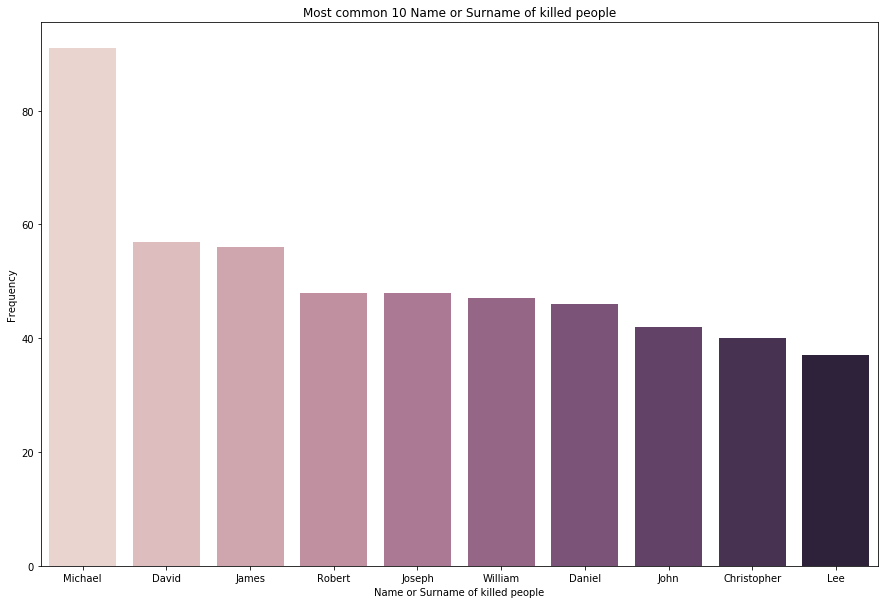

In [81]:
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 10 Name or Surname of killed people')

In [82]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [83]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


Text(0.5,1,"Percentage of Given State's Population Above 25 that Has Graduated High School")

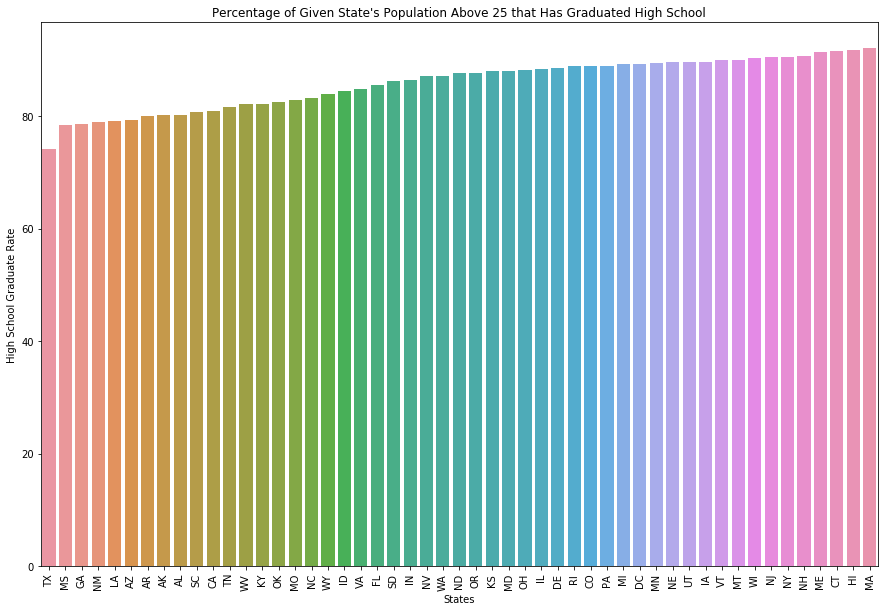

In [84]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

In [85]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [86]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [87]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

[Text(0,0.5,'States'),
 Text(0.5,0,'Percentage of Races'),
 Text(0.5,1,"Percentage of State's Population According to Races ")]

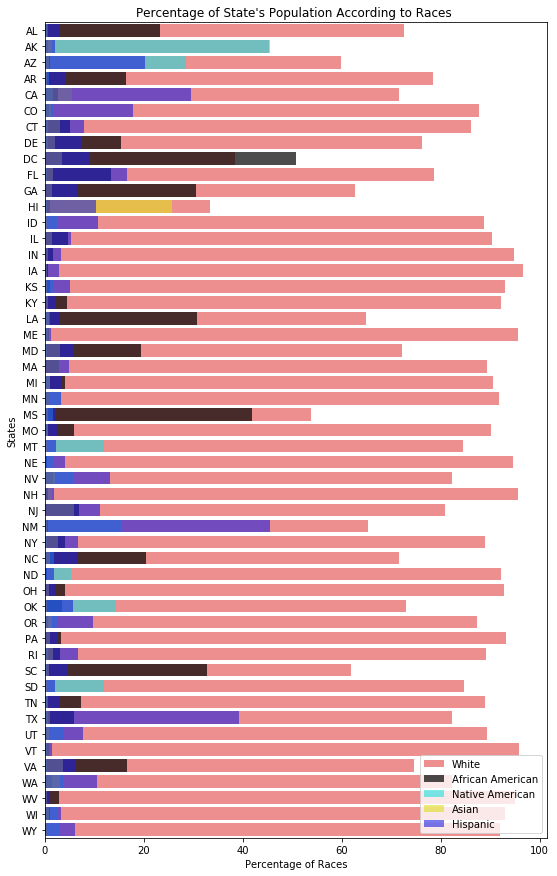

In [90]:
# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='red',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='black',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='blue',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

# Point Plot

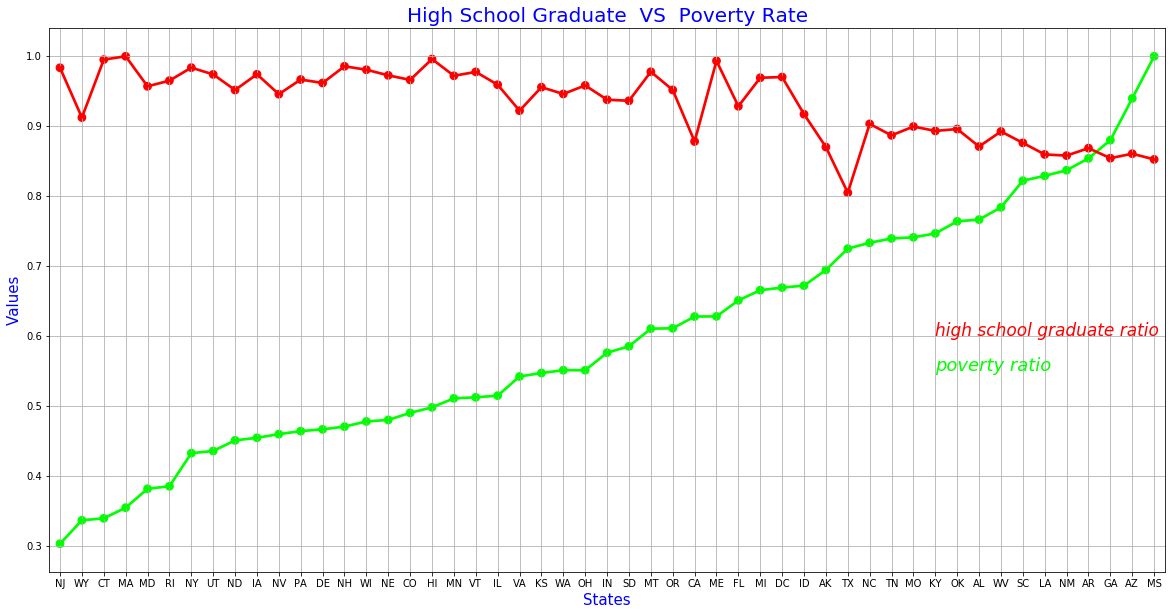

In [91]:
# high school graduation rate vs Poverty rate of each state
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

# Joint Plot


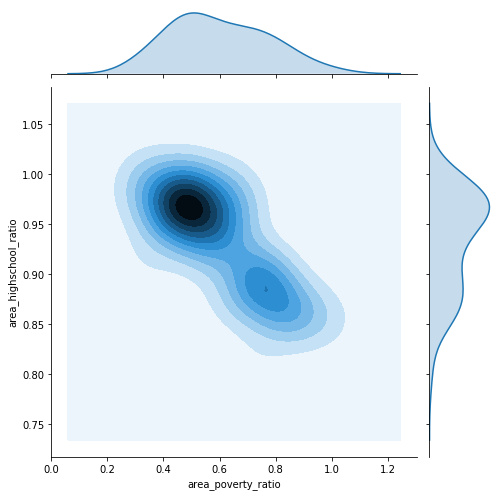

In [92]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

In [93]:
data .head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


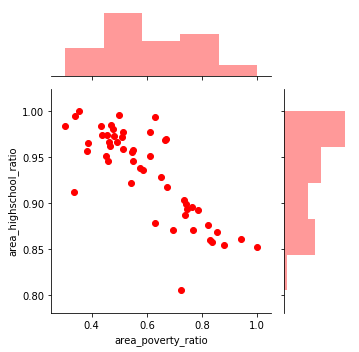

In [94]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,size=5, ratio=3, color="r")


Pie Chart¶

In [95]:
kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

In [96]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5,1,'Killed People According to Races')

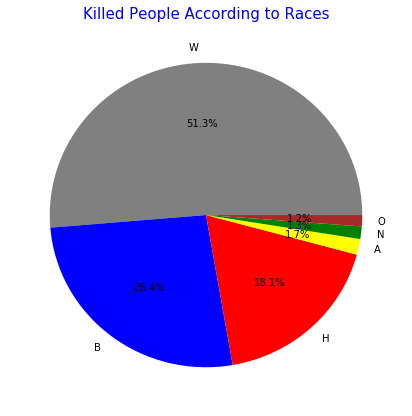

In [97]:
# Race rates according in kill data 
kill.race.dropna(inplace = True)
labels = kill.race.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

Lm Plot

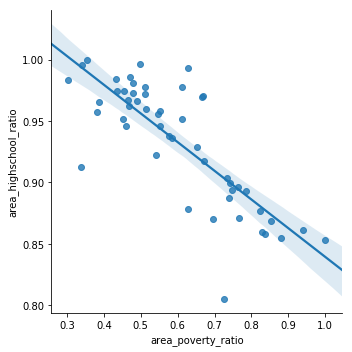

In [98]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()

# KDE Plot

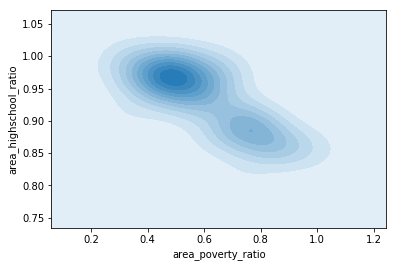

In [99]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# cubehelix plot
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=True, cut=3)
plt.show()

# Violin Plot

In [100]:
data.tail()

,area_list,area_poverty_ratio,area_highschool_ratio
31,NM,0.837207,0.858124
3,AR,0.854151,0.868748
10,GA,0.880204,0.854458
2,AZ,0.939884,0.860801
24,MS,1.000000,0.852679


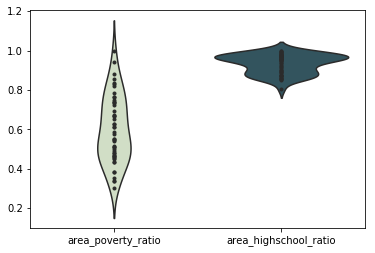

In [101]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

# Heatmap

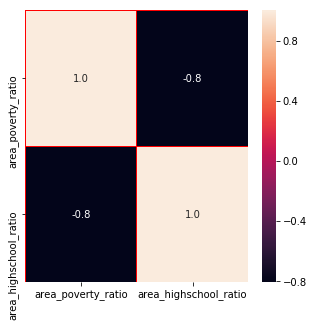

In [102]:
#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

# Swarm Plot


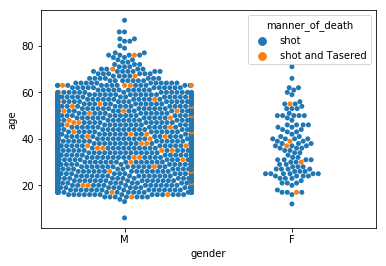

In [103]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()

# Pair Plot

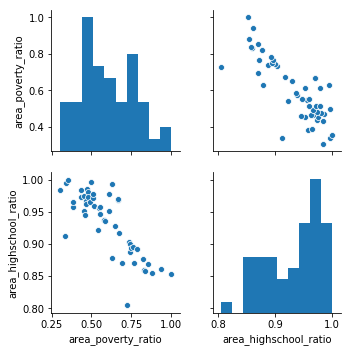

In [104]:
# pair plot
sns.pairplot(data)
plt.show()

# Count Plot


In [105]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

Text(0.5,1,'gender')

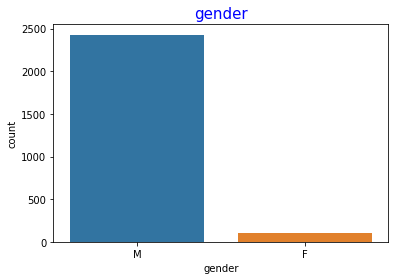

In [106]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

Text(0.5,1,'Kill weapon')

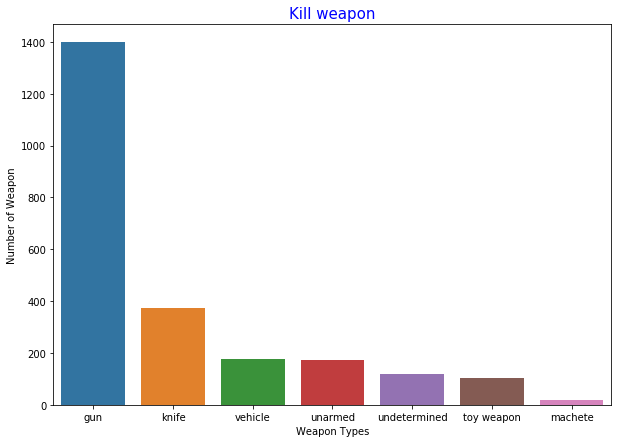

In [107]:
# kill weapon
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

Text(0.5,1,'Age of killed people')

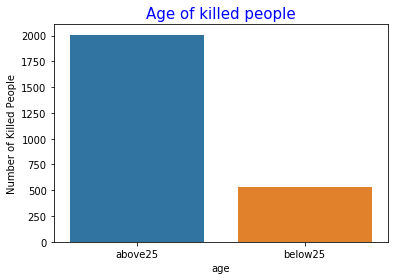

In [108]:
# age of killed people
above25 =['above25' if i >= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

Text(0.5,1,'Race of killed people')

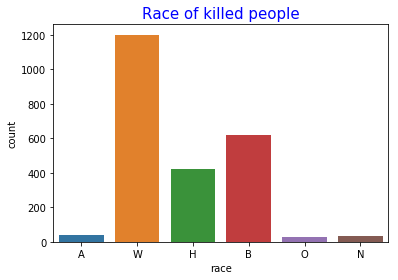

In [109]:
# Race of killed people
sns.countplot(data=kill, x='race')
plt.title('Race of killed people',color = 'blue',fontsize=15)

Text(0.5,1,'Most dangerous cities')

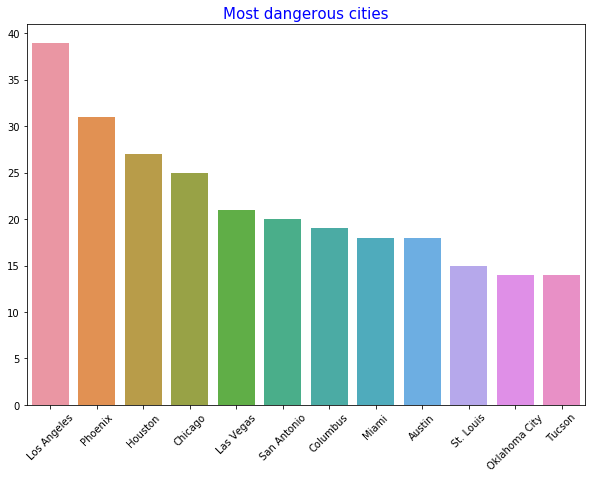

In [110]:
# Most dangerous cities
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'blue',fontsize=15)

Text(0.5,1,'Most dangerous state')

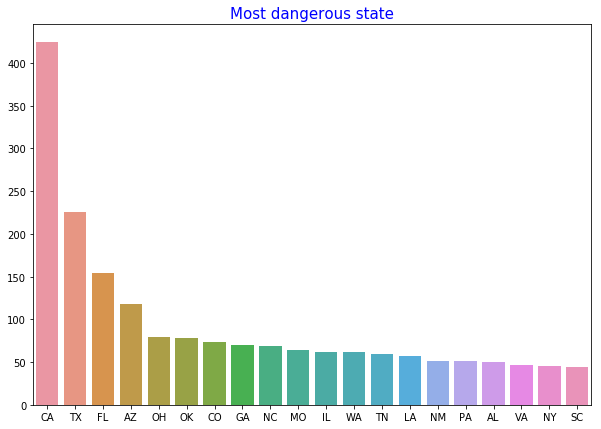

In [111]:
# most dangerous states
state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Most dangerous state',color = 'blue',fontsize=15)

Text(0.5,1,'Having mental illness or not')

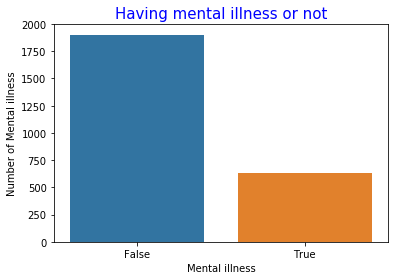

In [112]:
# Having mental ilness or not for killed people
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)

Text(0.5,1,'Threat types')

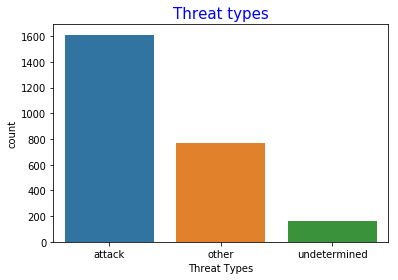

In [113]:
# Threat types
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)

Text(0.5,1,'Kill Numbers from States')

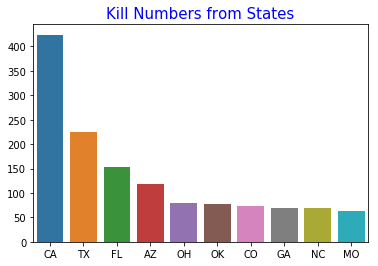

In [114]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)

In [ ]:

# Having body cameras or not for police
sns.countplot(kill.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)